In [6]:
#Name: Abel
#Date: 2021.08.11
#Purpose: to inquire about the effect of certain characteristics on price and to develop a predictive model on pricing based on current prices
#

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection, tree, linear_model

(174, 6)
(156, 6)


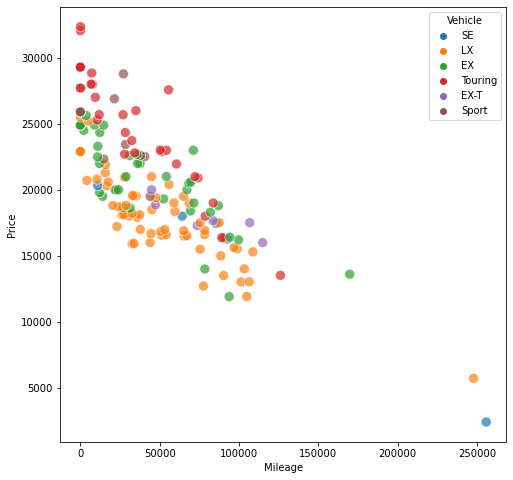

In [8]:
df = pd.concat(pd.read_excel('2021.08.10 Honda Civics (MLReady).xlsx', sheet_name=None), ignore_index=True) #compiles all the sheets into one DF
print (df.shape) #before 'more cleaning'

#-----Changes any models to NaN that have a count of less than or equal to 3------#
threshold = 3
value_counts = df['Vehicle'].value_counts()  
to_remove = value_counts[value_counts <= threshold].index
#print ('The following models will be removed:', to_remove)
df['Vehicle'].replace(to_remove, np.nan, inplace=True)

df = df.dropna(subset=['Vehicle', 'Year', 'Mileage', 'Price', 'Color']) #removes any NaN data; color is included to investigate the factor color
#df = df[df.Mileage < 150000]

print (df.shape)  #after 'more cleaning'
df = df.sort_values (by=['Price'], ascending=True)

#print (df.head(20))
plt.figure(figsize=(8,8)) #to view the data for further cleanup (e.g. remove outliers)
sns.scatterplot(x="Mileage", y="Price", hue='Vehicle', legend='full', s=100, alpha=0.7, data=df); #can fill x with 'vehicle', 'year', 'color', 'mileage'

In [16]:
#Case 1 - Quantitative input & Quantitative output - mileage vs. price
X = df[['Mileage']]
y = df.Price
print (X.shape, y.shape)

(156, 1) (156,)


In [10]:
model = tree.DecisionTreeRegressor(max_depth=100).fit(X, y)
print('score:', model.score(X, y))
print ('cross_val score:', model_selection.cross_val_score(model, X, y, cv=3))

# Evaluate the model
df['Predictions'] = model.predict(X)
df['Difference'] = abs((df.Predictions - y)/y)
#print (df.head(20))
print(f"Training Difference = {df.Difference.mean():.1%}")

score: 0.9854903551655337
cross_val score: [ -2.37475163 -11.91549033  -5.00802839]
Training Difference = 0.5%


In [15]:
model = linear_model.LinearRegression().fit(X, y)
print('score:', model.score(X, y))
print ('cross_val score:', model_selection.cross_val_score(model, X, y, cv=3))

# Evaluate the model
df['Predictions'] = model.predict(X)
df['Difference'] = abs((df.Predictions - y)/y)
#print (df.head(20))
print(f"Training Difference = {df.Difference.mean():.1%}")

score: 0.6453206957770155
cross_val score: [-0.44612965 -3.41462096 -3.91841053]
Training Difference = 11.7%


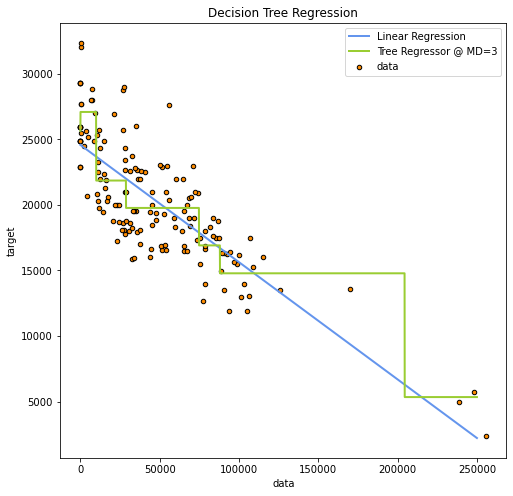

In [104]:
regr_1 = linear_model.LinearRegression().fit(X, y) #can hendle multiple inputs...
regr_2 = tree.DecisionTreeRegressor(max_depth=3).fit(X, y)

X_test = np.arange(0.0, 250000.0, 100)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(8,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="Linear Regression", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="Tree Regressor @ MD=3", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

   Max Depth  Mean Scores
0          1   -22.911164
1          2   -13.298830
2          3   -11.408181
3          4   -12.784414
4          5   -15.025800


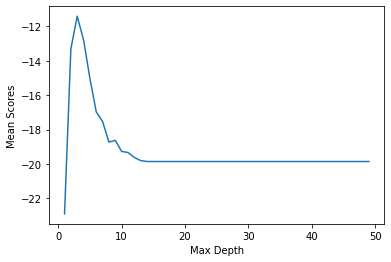

In [69]:
data_list = []
for i in range(1, 10):
    model = tree.DecisionTreeRegressor(max_depth=i).fit(X, y)
    scores = model_selection.cross_val_score(model, X, y, cv=5)
    data_list.append({
        'Max Depth': i,
        'Mean Scores': scores.mean(),
    })
# Plot accuracy (y-axis) vs max_depth (x-axis) using Seaborn's lineplot() function.
data = pd.DataFrame(data_list)
sns.lineplot(x='Max Depth', y='Mean Scores', data=data);
print (data)

In [45]:
from sklearn.metrics import r2_score

# This creates a large training set (80% of df) and a large test set (20% of df)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=8, test_size=1/3)
model = tree.DecisionTreeRegressor(max_depth=1000).fit(X_train, y_train)
print ('X_train: ' + str(X_train.shape), 'y_train: ' + str(y_train.shape), 'X_test: ' + str(X_test.shape), 'y_test: ' + str(y_test.shape))
#print ('X: ' + str(X.shape), 'y: ' + str(y.shape) )
df_test = pd.DataFrame (data=X_test.copy())
df_test['Price'] = y_test
print (X_test.shape)
print (df_test.shape)
df_test['Predictions'] = model.predict(X_test)
df_test['Difference'] = abs((df_test.Predictions - y_test)/y_test)
print('Training Score: ' + str(model.score(X_train, y_train)))
print('Test Score: ' + str(model.score(X_test, y_test)))
print('Test (R2) Score: ' + str(r2_score(y_test, model.predict(X_test))))
print(f"Training Difference = {df_test.Difference.mean():.3%}")
print (df_test.head(20))

X_train: (104, 1) y_train: (104,) X_test: (52, 1) y_test: (52,)
(52, 1)
(52, 2)
Training Score: 0.9423076923076923
Test Score: 0.019230769230769232
Test (R2) Score: 0.2302084403279766
Training Difference = 16.149%
     Mileage    Price  Predictions  Difference
105   101280  13009.0      16200.0    0.245292
31     65489  16494.0      21995.0    0.333515
171    86986  18790.0      17500.0    0.068654
104   106414  13019.0      17500.0    0.344189
77        10  25900.0      29300.0    0.131274
162    31085  22590.0      18599.0    0.176671
146    28673  20990.0      18809.0    0.103907
78         9  24900.0      22900.0    0.080321
28     35240  19515.0      25995.0    0.332052
129   114899  15995.0      15290.0    0.044076
128    44865  19995.0      20995.0    0.050013
164    27817  20950.0      22696.0    0.083341
135    54297  22995.0      20995.0    0.086975
107     3623  25635.0      20700.0    0.192510
11     74098  20900.0      15490.0    0.258852
24     55561  27577.0      20398.0